| |<font size="5">(Multiple Linear Regression )  الانحدار الخطي متعدد الحدود  </font>|
|-:|-:|
|<img src="https://www.cs.toronto.edu/~frossard/post/multiple_linear_regression/multiple_lreg.gif" width=300></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Train, Test  تحديد بيانات التدريب والاختبار </font>| 
||<font size="4">Sklearn  توظيف خوارزمية من مكتبة </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>| 

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice2.csv", index_col=0)

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold,Scaled_OverallQal,Scaled_SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,2566,61,3.5,8.660254e-01,5.000000e-01,0.658292,0.349002
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,2524,0,2.5,5.000000e-01,-8.660254e-01,-0.070084,0.008535
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,2706,42,3.5,-1.000000e+00,-1.836970e-16,0.658292,0.538150
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,2473,307,2.0,8.660254e-01,5.000000e-01,0.658292,-0.514775
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,3343,84,3.5,-2.449294e-16,1.000000e+00,1.386668,0.872312


 
![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
num_features=df.select_dtypes("number")

In [4]:
# المتغيرات الأكثر ارتباطا بالمتغير الهدف

cormat=num_features.corr()["SalePrice"].sort_values(ascending=False)
cormat.nlargest(9)

SalePrice            1.000000
Scaled_SalePrice     1.000000
TotalSF              0.815996
Scaled_OverallQal    0.792879
OverallQual          0.792879
GarageCars           0.644097
GarageArea           0.638807
TotalBath            0.633500
1stFlrSF             0.624230
Name: SalePrice, dtype: float64

In [5]:
# البحث عن القيم الناقصة
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].isna().sum()

OverallQual    0
TotalSF        0
GarageCars     0
GarageArea     0
TotalBath      0
1stFlrSF       0
dtype: int64

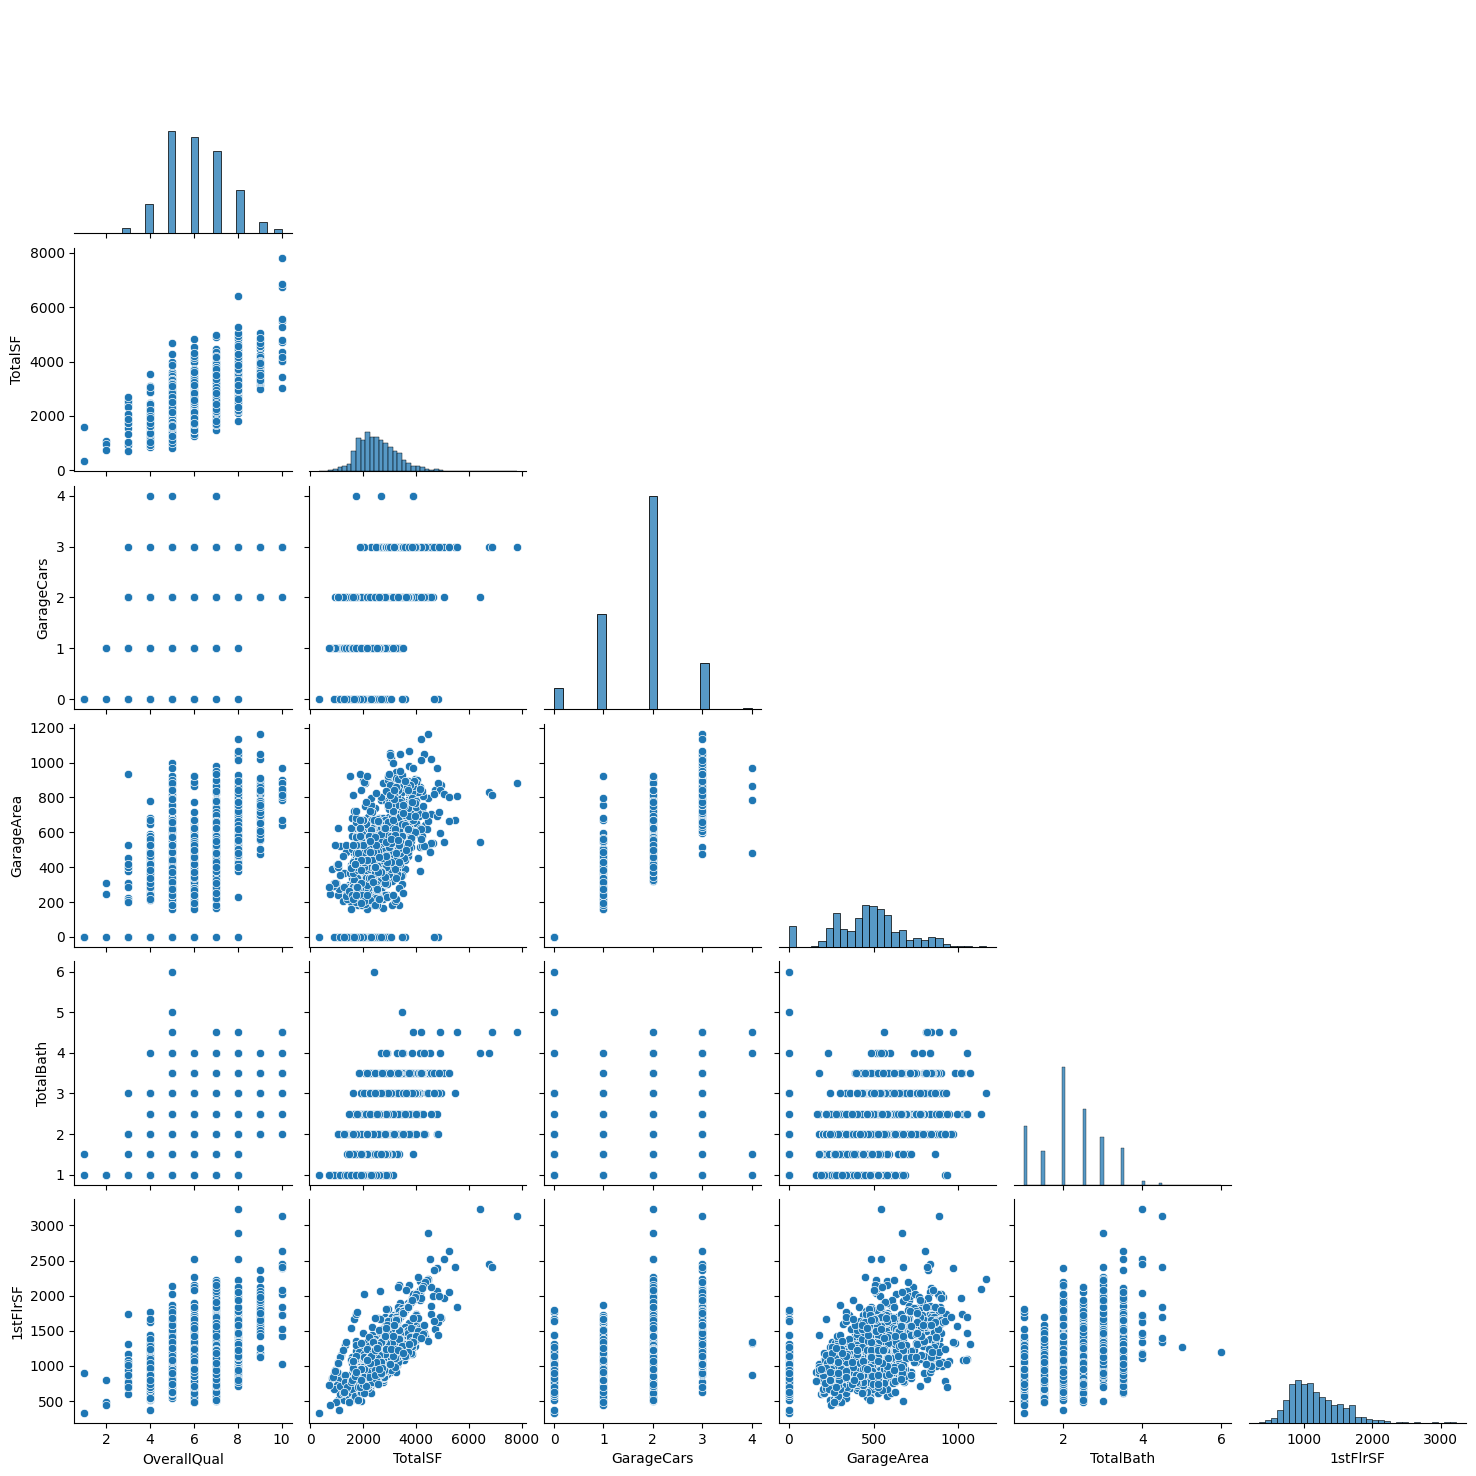

In [6]:
 
# البحث فيما إذا كانت المتغيرات مرتبطة فيما بينها 
import seaborn as sns
_= sns.pairplot(df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]] , corner=True)

In [7]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 

In [8]:
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].corr().T

,OverallQual,TotalSF,GarageCars,GarageArea,TotalBath,1stFlrSF
OverallQual,1.000000,0.673583,0.609812,0.573404,0.537348,0.471740
TotalSF,0.673583,1.000000,0.552030,0.556641,0.606065,0.782480
GarageCars,0.609812,0.552030,1.000000,0.890163,0.488596,0.447989
GarageArea,0.573404,0.556641,0.890163,1.000000,0.458509,0.476866
TotalBath,0.537348,0.606065,0.488596,0.458509,1.000000,0.383991
1stFlrSF,0.471740,0.782480,0.447989,0.476866,0.383991,1.000000


In [9]:
# مساحة المرآب وارتباطها بعدد السيارات 
df[["OverallQual", "TotalSF"  , "GarageCars", "GarageArea", "TotalBath", "1stFlrSF"]].sample(4)

,OverallQual,TotalSF,GarageCars,GarageArea,TotalBath,1stFlrSF
248,7,2508,2,500,2.5,840
319,7,2844,2,588,3.0,1472
410,5,2552,1,350,1.0,1276
1154,7,2684,2,492,2.0,902


In [10]:
#  التحقق من الارتباطات فيما بين الخصائص 
df[["GarageCars", "GarageArea"]].corr()

,GarageCars,GarageArea
GarageCars,1.000000,0.890163
GarageArea,0.890163,1.000000


$\Large z= \frac{x- \mu}{\sigma}$

$\large \mu : Mean$

$\large \sigma:  Standard Deviation $

In [11]:
# تعديل    معدل الأسعار وقيمة الاتحدار المعياري 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df["Scaled_SalePrice"]=scaler.fit_transform(df[["SalePrice"]])

## (Multiple Linear Regression ) معادلة الانحدار الخطي متعدد الحدود 
![](https://miro.medium.com/max/1238/1*r3aOsJoXHX7uC2nxn2lygQ.png)

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [12]:
# تحديد الخصائص والهدف 
X=df[["OverallQual", "TotalSF", "GarageCars"]] 
y=df["Scaled_SalePrice"]


![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [15]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.3, random_state=42)

<img src="https://static.thenounproject.com/png/2010152-200.png" width=100></img>

In [16]:
# تحميل النموذج
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [17]:
# تدريب البيانات 
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# التنبؤ
y_pred=lreg.predict(X_test)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [19]:
print(f" Score  : {lreg.score(X_test, y_test):.3f}")

 Score  : 0.806


In [20]:
# القياس 
from sklearn import metrics
import numpy as np
print(f" MAE  : {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f" MSE  : {metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f" RMSE  : {np.sqrt(metrics.r2_score(y_test, y_pred)):.3f}")

 MAE  : 0.312
 MSE  : 0.186
 RMSE  : 0.898


In [21]:
f" Coefficients : {lreg.coef_}"

' Coefficients : [0.26898083 0.00062959 0.19895249]'

In [22]:
f"intercept: {lreg.intercept_:.3f}"

'intercept: -3.605'

In [23]:
pd.DataFrame(lreg.coef_, X.columns, columns=['Coefficient'])

,Coefficient
OverallQual,0.268981
TotalSF,0.000630
GarageCars,0.198952


$$\Large \text{y_pred} = -3.706 + 0.308\color{red}*{OverallQual} + 0.516 *10^{-3}\color{red}*{TotalSF} + 0.287\color{red}*{GarageCars}  $$

In [24]:
df_pred =pd.DataFrame( {"Actual_P": y_test.ravel(), "Predicted_P": y_pred.ravel() })
df_pred

,Actual_P,Predicted_P
0,0.040060,0.268216
1,0.038799,0.024567
2,-0.451725,-0.532912
3,-0.830022,-0.747602
4,-1.220928,-1.798535
...,...,...
432,-0.689106,-1.135723
433,-0.004075,-0.412031
434,-0.760667,-1.043655
435,-0.287797,-0.670165


In [25]:
pd.DataFrame({
"Original_Price": scaler.inverse_transform(df_pred.Actual_P), 
"Predicted_Price":scaler.inverse_transform(df_pred.Predicted_P),
 })

,Original_Price,Predicted_Price
0,184000.0,202093.446798
1,183900.0,182771.371524
2,145000.0,138561.674554
3,115000.0,121536.129142
4,84000.0,38194.067009
...,...,...
432,126175.0,90756.969738
433,180500.0,148147.905402
434,120500.0,98058.252802
435,158000.0,127677.137000


In [26]:
import warnings
warnings.filterwarnings('ignore')

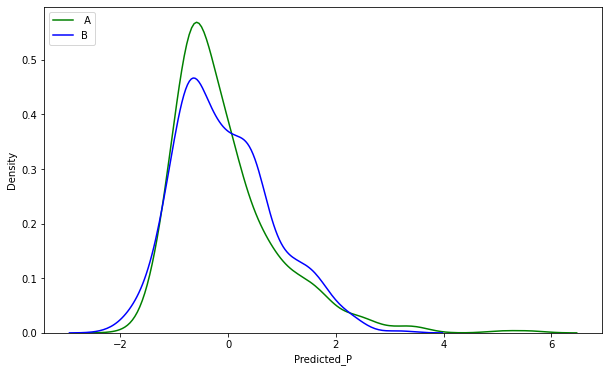

In [27]:
#   تخطيط البيانات الاصلية  / التنبؤ
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))

sns.distplot(df_pred.Actual_P, hist=False, bins=10, color="g", label=" A")
sns.distplot(df_pred.Predicted_P,hist=False,  bins=10, color="b" , label="B" )
plt.legend(loc='upper left')

In [28]:
df_pred.keys()

Index(['Actual_P', 'Predicted_P'], dtype='object')

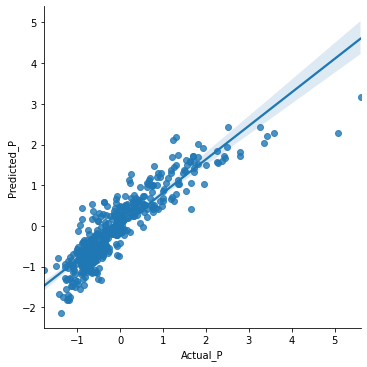

In [29]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.lmplot("Actual_P",  "Predicted_P", data=df_pred)

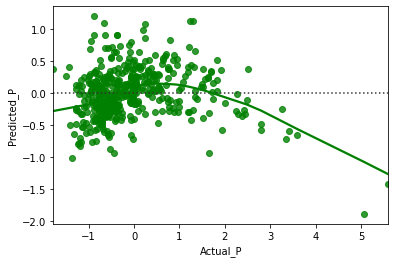

In [30]:
# نخطيط البقايا
_=sns.residplot(df_pred.Actual_P, df_pred.Predicted_P, lowess=True, color="g")

In [31]:
! pip install scikit-plot

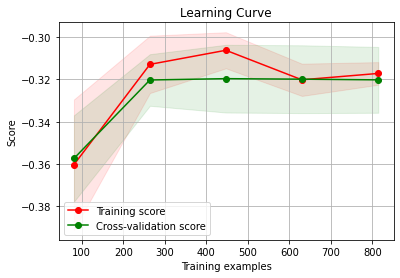

In [32]:
# تخطيط التعلم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lreg, X_train, y_train, scoring="neg_mean_absolute_error")